In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, accuracy_score, roc_auc_score, ConfusionMatrixDisplay

In [39]:
url = "https://raw.githubusercontent.com/Martin-carrizalez/CHATBOT-SOP-CON-IMG/refs/heads/main/dataset/PCOS_data.csv"
df = pd.read_csv(url)
df = df.dropna()
df.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.3,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.9,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.3,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.7,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.1,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


<function matplotlib.pyplot.show(close=None, block=None)>

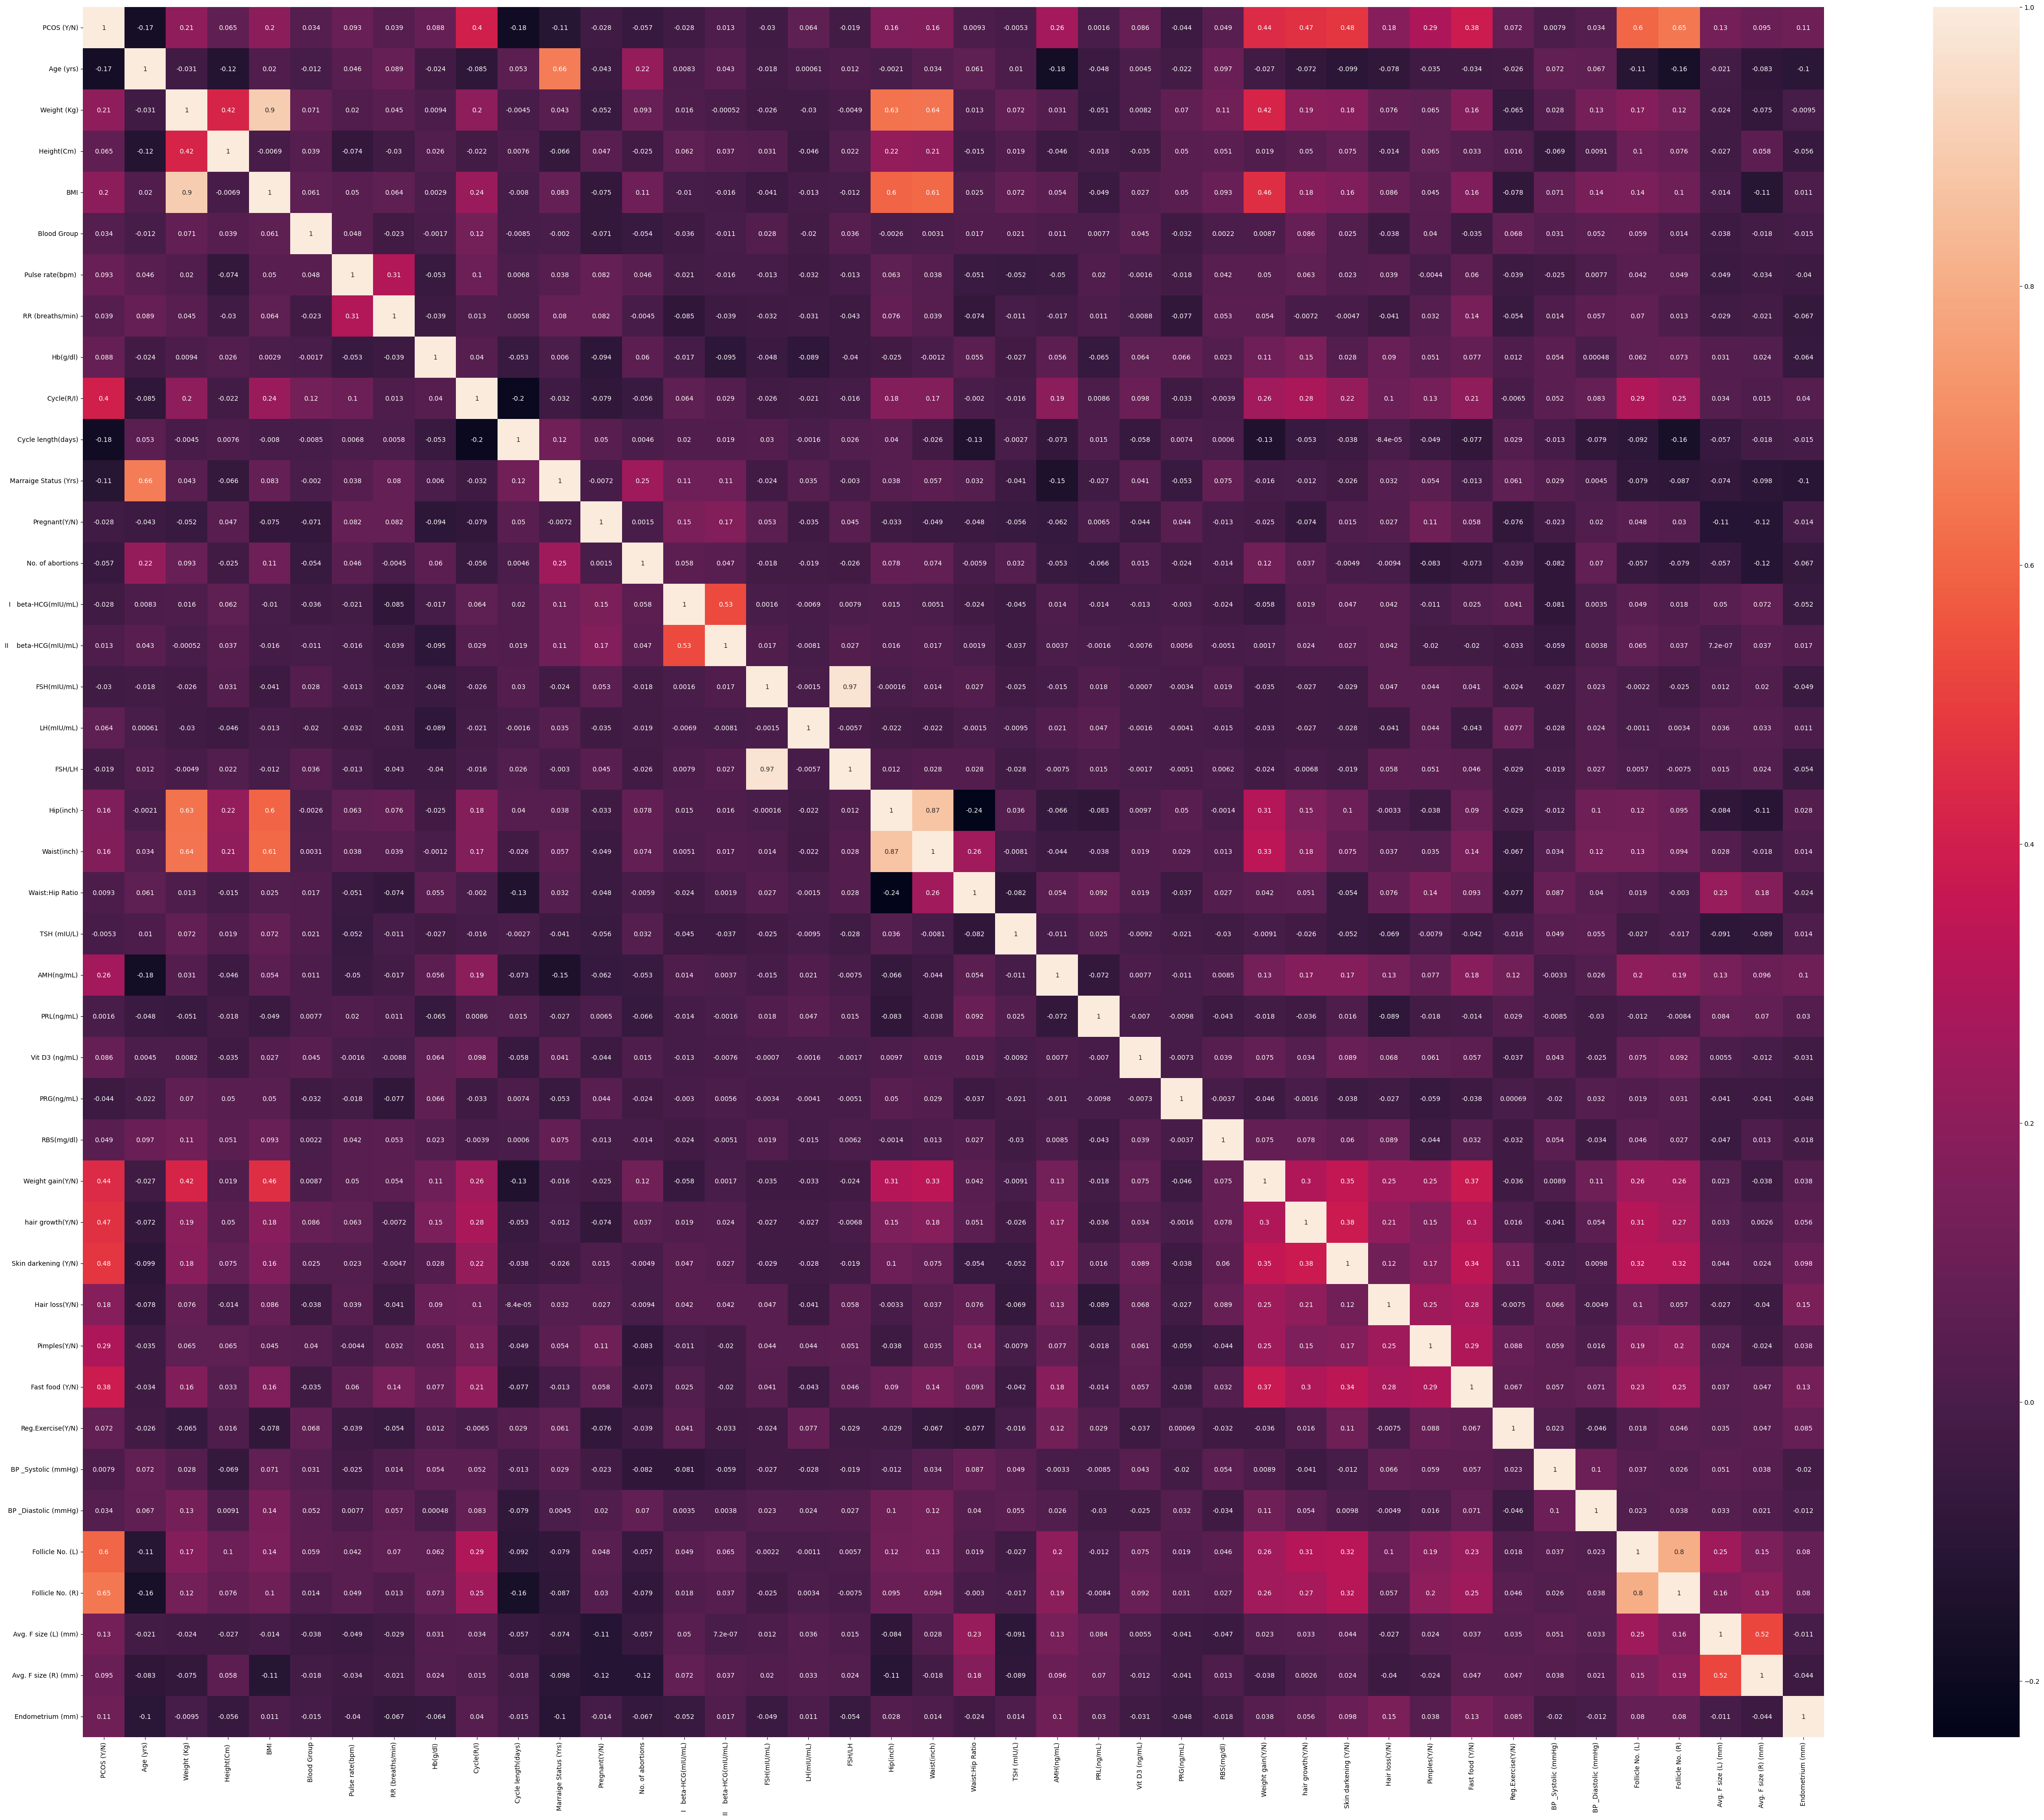

In [40]:
#Matrix de correlacion
fig, ax = plt.subplots(figsize=(60,48))
sns.heatmap(df.corr(),ax=ax, annot= True)
plt.show

In [41]:
#Renombramos las variales con mas correlacion a la objetivo, pero menos correlacion entre ellas
var_dict = {
    "PCOS (Y/N)":"y",
    " Age (yrs)":"age",
    "Follicle No. (R)":"fol_r",
    "Skin darkening (Y/N)":"skin_dar",
    "hair growth(Y/N)":"hair_gr",
    "Weight (Kg)":"wt",
    "Weight gain(Y/N)":"wt_gain",
    "Cycle(R/I)":"cycle",
    "Fast food (Y/N)":"f_food",
    "Pimples(Y/N)":"pimples",
    "AMH(ng/mL)":"amh",
    "Hair loss(Y/N)":"hair_ls",
    "Cycle length(days)":"cycle_l",
    "Waist(inch)":"waist"
    
}

df = df.rename(columns=var_dict)
df.head()

,y,age,wt,Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),cycle,...,pimples,f_food,Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),fol_r,Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.3,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.9,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.3,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.7,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.1,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   y                       538 non-null    int64  
 1   age                     538 non-null    int64  
 2   wt                      538 non-null    float64
 3   Height(Cm)              538 non-null    float64
 4   BMI                     538 non-null    float64
 5   Blood Group             538 non-null    int64  
 6   Pulse rate(bpm)         538 non-null    int64  
 7   RR (breaths/min)        538 non-null    int64  
 8   Hb(g/dl)                538 non-null    float64
 9   cycle                   538 non-null    int64  
 10  cycle_l                 538 non-null    int64  
 11  Marraige Status (Yrs)   538 non-null    float64
 12  Pregnant(Y/N)           538 non-null    int64  
 13  No. of abortions        538 non-null    int64  
 14    I   beta-HCG(mIU/mL)  538 non-null    float64

In [43]:
X = df.drop(columns="y")
y = df["y"]

In [44]:
df.groupby("y").size()

y
0    362
1    176
dtype: int64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
logit_model = sm.Logit(y_train,X_train)

In [47]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.157485
         Iterations 13


In [48]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  430
Model:                          Logit   Df Residuals:                      389
Method:                           MLE   Df Model:                           40
Date:                Thu, 06 Nov 2025   Pseudo R-squ.:                  0.7548
Time:                        12:25:58   Log-Likelihood:                -67.719
converged:                       True   LL-Null:                       -276.17
Covariance Type:            nonrobust   LLR p-value:                 3.069e-64
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
age                       -0.0374      0.069     -0.540      0.589      -0.173       0.098
wt                         0.2618      0.278      0.942      0.346      -0.283       0.807
Height(Cm)                -0.1179      0.210     -0.562      0.574      -0.529       0.293
BMI                       -0.5799      0.690     -0.841      0.400      -1.931       0.772
Blood Group               -0.0569      0.148     -0.384      0.701      -0.347       0.234
Pulse rate(bpm)            0.0894      0.113      0.791      0.429      -0.132       0.311
RR (breaths/min)          -0.1269      0.189     -0.670      0.503      -0.498       0.244
Hb(g/dl)                   0.1150      0.341      0.337      0.736      -0.554       0.784
cycle                      0.8439      0.335      2.521      0.012       0.188       1.500
cycle_l                   -0.1896      0.184     -1.032      0.302      -0.550       0.171
Marraige Status (Yrs)     -0.0791      0.077     -1.031      0.303      -0.230       0.071
Pregnant(Y/N)             -0.6217      0.526     -1.181      0.237      -1.653       0.410
No. of abortions          -0.5021      0.475     -1.056      0.291      -1.434       0.430
  I   beta-HCG(mIU/mL) -6.453e-05   5.24e-05     -1.232      0.218      -0.000    3.81e-05
II    beta-HCG(mIU/mL)  2.111e-05   9.43e-05      0.224      0.823      -0.000       0.000
FSH(mIU/mL)               -0.1045      0.126     -0.828      0.408      -0.352       0.143
LH(mIU/mL)                 0.1075      0.131      0.819      0.413      -0.150       0.365
FSH/LH                     0.0097      0.031      0.316      0.752      -0.050       0.070
Hip(inch)                  0.1311      0.893      0.147      0.883      -1.618       1.880
waist                     -0.1126      0.973     -0.116      0.908      -2.019       1.794
Waist:Hip Ratio            8.2739     38.093      0.217      0.828     -66.387      82.934
TSH (mIU/L)                0.0732      0.088      0.830      0.407      -0.100       0.246
amh                        0.0361      0.049      0.741      0.458      -0.059       0.132
PRL(ng/mL)                 0.0124      0.020      0.630      0.528      -0.026       0.051
Vit D3 (ng/mL)             0.0006      0.002      0.327      0.743      -0.003       0.004
PRG(ng/mL)                -0.2117      0.233     -0.907      0.364      -0.669       0.246
RBS(mg/dl)                 0.0268      0.018      1.474      0.141      -0.009       0.062
wt_gain                    1.2320      0.608      2.025      0.043       0.040       2.424
hair_gr                    2.0695      0.630      3.283      0.001       0.834       3.305
skin_dar                   1.6393      0.590      2.776      0.005       0.482       2.797
hair_ls                    0.1262      0.514      0.245      0.806      -0.882       1.134
pimples                    1.3608      0.577      2.359      0.018       0.230       2.492
f_food                     0.8193      0.532      1.541 

In [57]:
logit_model = smf.logit(formula="y~age+fol_r+skin_dar+hair_gr+wt_gain+cycle+pimples", data=df).fit()
#variables posibles: +amh+hair_ls+cycle_l+waist+wt+f_food

Optimization terminated successfully.
         Current function value: 0.223634
         Iterations 8


In [58]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  538
Model:                          Logit   Df Residuals:                      530
Method:                           MLE   Df Model:                            7
Date:                Thu, 06 Nov 2025   Pseudo R-squ.:                  0.6462
Time:                        12:29:12   Log-Likelihood:                -120.32
converged:                       True   LL-Null:                       -340.09
Covariance Type:            nonrobust   LLR p-value:                 7.806e-91
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.7811      1.222     -5.549      0.000      -9.176      -4.386
age           -0.0707      0.032     -2.229      0.026      -0.133      -0.009
fol_r          0.5123      0.055      9.246      0.000       0.404       0.621
skin_dar       1.4839      0.359      4.135      0.000       0.781       2.187
hair_gr        1.7641      0.371      4.760      0.000       1.038       2.490
wt_gain        1.4798      0.351      4.213      0.000       0.791       2.168
cycle          0.7714      0.181      4.272      0.000       0.417       1.125
pimples        1.0798      0.348      3.107      0.002       0.399       1.761
==============================================================================
"""

In [70]:
#Establecemos el limite para la clasificacion de las variables
y_prob=logit_model.predict(X_test)
y_pred = np.where(y_prob > 0.5, 1, 0)

In [71]:
#Guardamos e imprimimos metricas del modelo
auc_elegidas = accuracy_score(y_pred, y_test)
print(f'La certeza del modelo con las variables elegidas es de: {auc_elegidas}')

La certeza del modelo con las variables elegidas es de: 0.8796296296296297


In [72]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

print("=== Reporte modelo con RFE ===")
print(classification_report(y_test, y_pred))

print(f"AUC con las variables elegidas: {auc_elegidas:.4f}")

=== Reporte modelo con RFE ===
              precision    recall  f1-score   support

           0       0.91      0.92      0.92        79
           1       0.79      0.76      0.77        29

    accuracy                           0.88       108
   macro avg       0.85      0.84      0.85       108
weighted avg       0.88      0.88      0.88       108

AUC con las variables elegidas: 0.8796


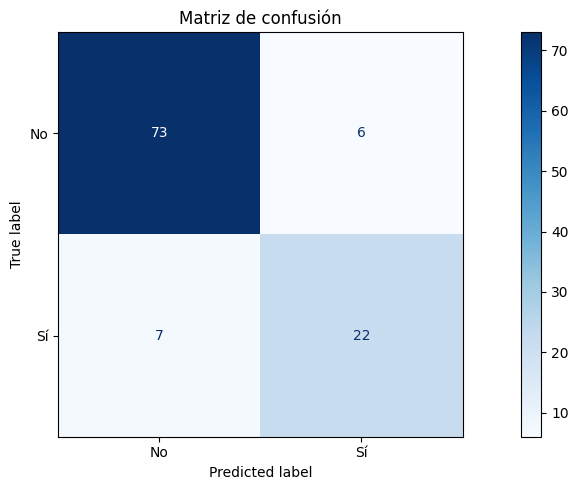

In [84]:
# Visualización de las matrices de confusión (para threshold 0.5)
fig, ax = plt.subplots(figsize=(12, 5))

ConfusionMatrixDisplay(cm, display_labels=["No", "Sí"]).plot(ax=ax, cmap='Blues')
ax.set_title("Matriz de confusión")

plt.tight_layout()
plt.show()

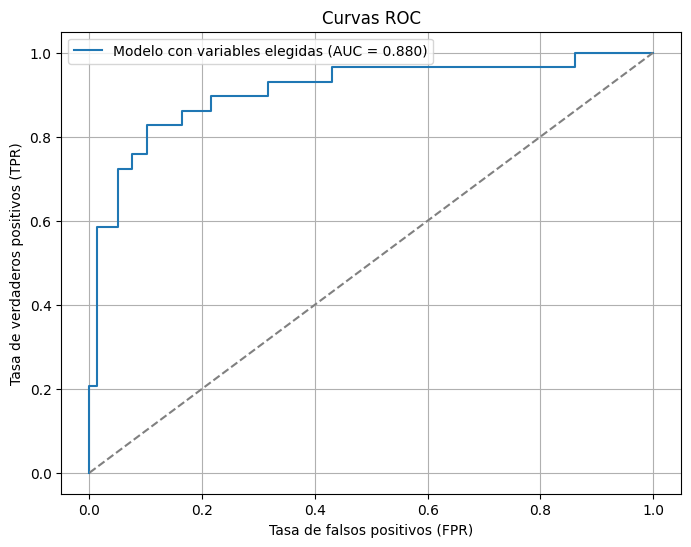

In [86]:
# Curvas de ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Modelo con variables elegidas (AUC = {auc_elegidas:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curvas ROC')
plt.legend()
plt.grid(True)
plt.show()